## Load Model and Show its Architecture

In [21]:
import sys
import argparse
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.models import load_model
from keras.applications.inception_v3 import preprocess_input




#LOOK AT retrained MODEL on tiny data set ( of just 60 Females from the 2000s and then 25 other F's as validation)
model = load_model("model/inceptionv3-ft.model")
print(model.summary())

#details on inception v3 architecture
#https://github.com/fchollet/keras/blob/master/keras/applications/inception_v3.py

#how the model was made.  
#  python fine-tune.py --data_dir="../data/yearbook" --input_dir="train" --valid_dir="valid" --train_file="yearbook_train_small2000s.txt" --valid_file="yearbook_valid_small2000s.txt" --model_name="inceptionv3"

# if you are using a subset of data, before running the above, 
# you need to manually make the yearbook_train_small2000s.txt and yearbook_valid_small2000s.txt files 
# and the folder data/valid_inceptionv3/

# if you want to generate the model from all the data, do the following
#  python fine-tune.py --data_dir="../data/yearbook" --input_dir="train" --valid_dir="valid" --train_file="yearbook_train.txt" --valid_file="yearbook_valid.txt" --model_name="inceptionv3"


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, None, None, 32 864         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, None, None, 32 96          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, None, None, 32 0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

## Show Sample Image to Predict, and Show Histogram of Predictions 

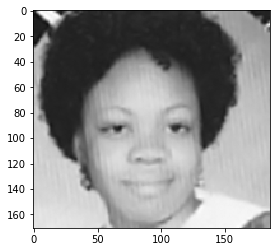

In [23]:
#Look At Sample Image To Predict 
f = "F/000680.png"
img = Image.open("data/yearbook/train/"+f)    #TRUE RESPONSE:  2001
%matplotlib inline
plt.imshow(img)

Prediction with probability 0.442535251 and index: 13 of 2013


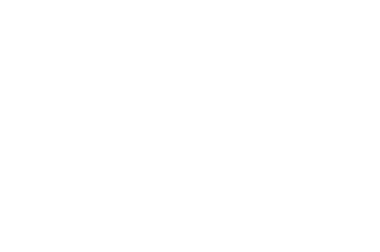

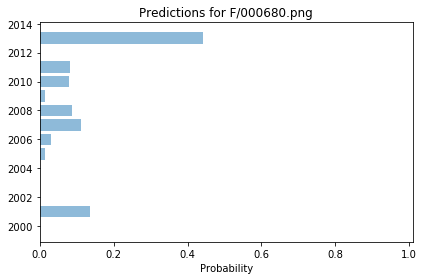

In [29]:
#The following script is how I got predictions for a given image
#python predict.py --image ../data/yearbook/train/F/000680.png --model inceptionv3-ft.model

preds = [7.15491478e-05, 1.36070222e-01, 4.75838835e-09, 2.75789207e-05 , 2.34750900e-04, 1.39142768e-02, 2.95705236e-02, 1.12968966e-01 , 8.78592059e-02, 1.54093141e-02, 8.00036937e-02, 8.13279748e-02 , 6.58842146e-06, 4.42535251e-01]
labels = [i + 2000  for i in range(14) ]

print("Prediction with probability "+ str(max(preds)) +" and index: "+ str(preds.index(max(preds))) + " of " +str(labels[preds.index(max(preds))]))
plt.axis('off')
plt.figure()

plt.barh(labels, preds, alpha=0.5)
plt.title("Predictions for "+f)
plt.xlabel('Probability')
plt.xlim(0,1.01)
plt.tight_layout()
plt.show()

#savefig("pred.png")

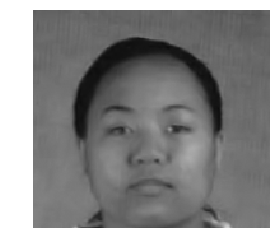

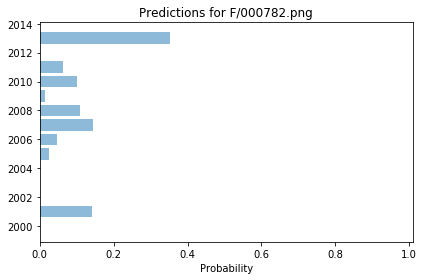

In [31]:
f2 = "F/000782.png"   
img2 = Image.open("data/yearbook/train/"+f2)    #TRUE RESPONSE:  2013
plt.imshow(img2)
preds2 = [4.88650054e-04, 1.41260266e-01, 3.27573105e-07, 2.05188859e-04 , 1.27761823e-03, 2.58977674e-02, 4.79926243e-02, 1.43489718e-01 , 1.08343594e-01, 1.50818210e-02, 1.00244790e-01, 6.34194836e-02 , 5.84914196e-05, 3.52239668e-01]

plt.axis('off')
plt.figure()

plt.barh(labels, preds2, alpha=0.5)
plt.title("Predictions for "+f2)
plt.xlabel('Probability')
plt.xlim(0,1.01)
plt.tight_layout()
plt.show()


##  Scratch ..help move image files into folder structure expected by keras for training

In [1]:
import pandas as pd
import os
from shutil import copyfile

train = pd.read_csv("data/yearbook/yearbook_train.txt",names=['imagepath','year'],delimiter="\t")
train['gender'] = [ t.split("/")[0] for t in train['imagepath']]
train['imagepath'] = [ t.split("/")[1] for t in train['imagepath']]

print("Women: ",train[train['gender']=='F'].shape)
print("Men: ",train[train['gender']=='M'].shape)

def create_folder_with_classes(input_folder,output_folder,train):
    os.system("mkdir data/yearbook/"+output_folder)
    os.system("mkdir data/yearbook/"+output_folder+"/F")
    os.system("mkdir data/yearbook/"+output_folder+"/M")
    #make women folders and copy over file
    womenyears = sorted(train[train['gender']=='F']["year"].unique())
    for y in womenyears:
        curfolder = "data/yearbook/"+output_folder+"/F/"+str(y)
        os.system("mkdir "+curfolder)
        imgs = train[(train["year"] == y) & (train["gender"] == 'F')]["imagepath"]
        for i in imgs:
            copyfile(input_folder+"/F/"+i, curfolder+"/"+i)
        
    #make men folders
    menyears = sorted(train[train['gender']=='M']["year"].unique())
    for y in menyears:
        curfolder = "data/yearbook/"+output_folder+"/M/"+str(y)
        os.system("mkdir "+curfolder)
        imgs = train[(train["year"] == y) & (train["gender"] == 'M')]["imagepath"]
        for i in imgs:
            copyfile(input_folder+"/M/"+i, curfolder+"/"+i)

#create_folder_with_classes("data/yearbook/train","train_inception3",train)

Women:  (12149, 3)
Men:  (10691, 3)
